# <b>KDD WeFive_HighFive (Group 1)

<b>Group 1:
<p>Akhil Chundarthil (801137901)
<p>Akhila Vemana (801149644)
<p>Keerthi Reddy Kandi (801149971)
<p>Akshara Gone (801136090)
<p>Koushik Koritala (801135486)

# Github Link : https://github.com/kddprojectgroup1/kdd-project-group_1

# Project Title: Mining and Modeling NYC Airbnb Data.

The project focuses on analyzing NYC Airbnb to predict the ratings of Airbnb based on their location, price range, guests experience (reviews) and other related features. As Airbnb moves towards becoming an end-to-end travel platform, it is increasingly important for us to deliver travel insights that help people in making decisions about their trips. To scale our ability to answer queries, we needed a systematic approach for serving high-quality information about entities (e.g. ratings, cities, landmarks, events, etc.) and the relationships between them (e.g. the most popular landmark in a city for a reasonable price, the best neighbourhood to stay, etc.)
<br> Our project will accomplish this, following the CRISP-DM process in each phase. We finally achieve useful insights from the observations done in this project.

# Dataset

Dataset Link: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels 

The dataset has the following attributes :

* id
* name
* host_id
* host_name
* neighbourhood_group
* neighbourhood
* latitude
* longitude
* room_type
* price
* minimum_nights
* number_of_reviews
* last_review
* reviews_per_month
* calculated_host_listings_count
* availability_365
* RATINGS ( 1-5 : 1- Lowest, 5- Highest ).This column is not included in dataset, this target variable is added during the data preparation phase.


# Data Preprocessing and Data Preparation

## Importing Libraries

First step before we proceed to our analysis is importing the necessary libraries. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
from apyori import apriori
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Reading Dataset

Next, we import the dataset of new york city Air BnB by using pandas "read_csv" function and storing in variable 'ds'.

In [3]:
ds=pd.read_csv("AB_NYC_2019.csv")
s=ds

## Checking Data Types

Checking the data types of the columns present in dataset. This data type object (dtype) informs us about the layout of the array. Type of the data may be integer, float, Python object etc.

In [4]:
ds.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Summary of Data set

Checking the data types of the columns present in dataset. Info generally prints a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## Dimensionality

Shape returns a tuple representing the dimensionality of the DataFrame.It Finds the  number of rows and columns of dataset.

In [6]:
ds.shape

(48895, 16)

## Null Values

Null values affects the observations made by being biased. It is important to check if the dataset has null values and performing the data cleaning to handle such null values. isnull is used here to check null values in all columns of data set. 

In [7]:
ds.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Removing irrelavant features

We drop the columns 'id', 'last_review' as they are not significant for our future data exploration and predictions. Drop function specified labels from rows or columns

In [8]:
ds.drop(['id','last_review'], axis=1, inplace=True)

We drop 'availability_365' rows with value "0" as it indicates that AirBnB is not open on any day in a year which cannot be the case because based on our domain knowledge an AirBnB will be open for atleast one day.

In [9]:
ds.drop(ds[ds['availability_365']==0].index,inplace=True)

## Handling Missing Values

Filling the 'reviews_per_month' column missing values with "0" because we cannot predict the count of reviews made by guest as it varies time to time. And filling with '0' is considerable as it is more realistic than filling with random values or other methods like mode, median, mean.

In [10]:
ds.fillna({'reviews_per_month':0}, inplace=True)

## Feature Scaling

We are feature scaling the 'reviews_per_month' column values by converting it to integer and multiplying the column values with 30 and then rounded it to nearest integer as the values prior were of type float which generally is not the case because reviews by guests will be positive integers.

In [11]:
ds['reviews_per_month']=ds['reviews_per_month']*30

In [12]:
round(ds['reviews_per_month']).head(5)

0      6.0
1     11.0
2      0.0
3    139.0
5     18.0
Name: reviews_per_month, dtype: float64

## Converting Data Types

From the output of "info" function, we saw that some of the columns in our dataset seems to be misleading in a wrong way. So, changing data types of those columns from object type to relevant types.

In [13]:
ds['neighbourhood']=ds['neighbourhood'].astype('category')
ds['neighbourhood_group']=ds['neighbourhood_group'].astype('category')
ds['room_type']=ds['room_type'].astype('category')
ds['reviews_per_month']=ds['reviews_per_month'].astype('int')

## Dataset Description

Finding the structure of dataset. Describe function prints the structure of only numeric columns in the dataset by excluding the other different types of columns.

In [14]:
ds.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,44.928544,10.334067,175.831994
std,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,53.385321,40.700398,126.187636
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,5.000000,1.000000,55.000000
50%,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,27.000000,1.000000,168.000000
75%,1.452145e+08,40.763030,-73.930132,189.000000,5.000000,39.000000,70.000000,3.000000,305.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,1755.000000,327.000000,365.000000


## Handling Outliers

Removing the Outliers after finding the five point summary of the respective attributes. After performing the five point summary, we got the range of outliers and dropped them by using "drop" function.

In [15]:
ds= ds.drop(ds[(ds['minimum_nights']>365)].index)
ds= ds.drop(ds[(ds['number_of_reviews']>500)].index)
ds= ds.drop(ds[(ds['calculated_host_listings_count']>100)].index)
ds= ds.drop(ds[(ds['price']>1800)].index)
ds= ds.drop(ds[(ds['price']<1)].index)
ds= ds.drop(ds[(ds['reviews_per_month']>168)].index)

In [16]:
ds.dtypes

name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                     category
latitude                           float64
longitude                          float64
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
reviews_per_month                    int32
calculated_host_listings_count       int64
availability_365                     int64
dtype: object

<b>As exploration of data is done till now, we now derived new "rating" column based on neighbourhood_group(location), price range and their availability in a year from the available columns in dataset. We categorized Brooklyn and Manhattan to one category and Queens,Staten Island, Bronx to other category for deriving the rating of available AirBnBs in these neighbourhood_groups because, the locations are near Manhattan and Brooklyn are costly areas in New York City, and the ratings of Airbnb varies compared to other locations which are rural like Bronx. So, AirBnBs in Bronx area should have low price range but with better facilities.

In [17]:
ds['rating']=1
for i in range(len(ds)):
    if((str(ds.iloc[i,3]) in ['Manhattan','Brooklyn'])):
        if((ds.iloc[i,8]<100) and (ds.iloc[i,13]>200)):
            ds.iloc[i,14]=5
        elif((ds.iloc[i,8]<500) and (ds.iloc[i,13]>100)):
            ds.iloc[i,14]=4
        elif(ds.iloc[i,8] in range(500,1000) and (ds.iloc[i,13]in range(30,250))):
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(1000,3000)) and (ds.iloc[i,13] in range(10,150))):
            ds.iloc[i,14]=2
    elif((str(ds.iloc[i,3]) in ['Queens','Staten Island','Bronx'])):
        if((ds.iloc[i,8] in range(850,2000)) and (ds.iloc[i,13] < 150)):
            ds.iloc[i,14]=2
        elif((ds.iloc[i,8] in range(500,850)) and (ds.iloc[i,13] < 250)) :
            ds.iloc[i,14]=3
        elif((ds.iloc[i,8] in range(150,500)) and (ds.iloc[i,13] < 300)) :
            ds.iloc[i,14]= 4
        elif((ds.iloc[i,8]<150) and (ds.iloc[i,13] in range(200,365))):
            ds.iloc[i,14]=5

# Data Visualization

<b>Plotting the most repeated words in name column as an image using WordCloud and STOPWORDS packages in python.
Installed the packages 'conda install -c conda-forge wordcloud and conda install stop-words'

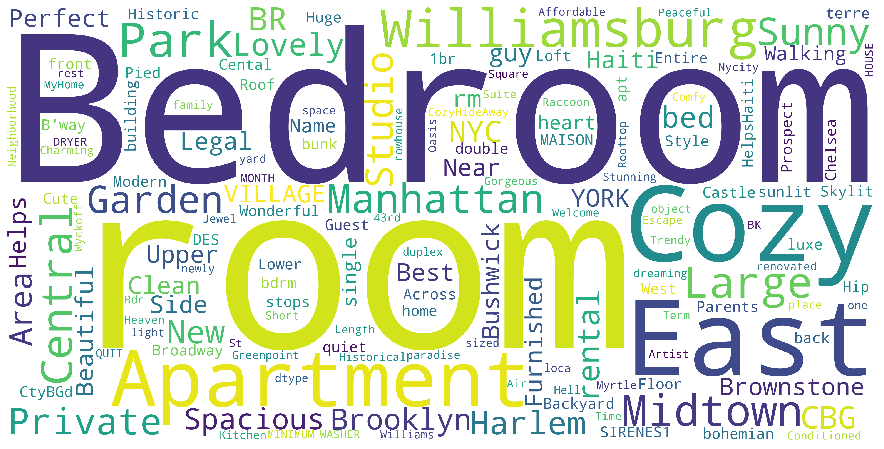

In [16]:
name_corpus = ''.join(str(ds['name']))
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

## Observation

The output above shows the most frequent number of words in listings "name" column which are including: Bedroom, room, cozy, Midtown, williamsburg etc. There are some words which specifically tell about AirBnb desription like: Large, East, Private, cozy, living room, sunny, etc . These are typical words for hosts when describing their listings.

<b>Marking the scatter plot for the neighborhood groups in New York City.

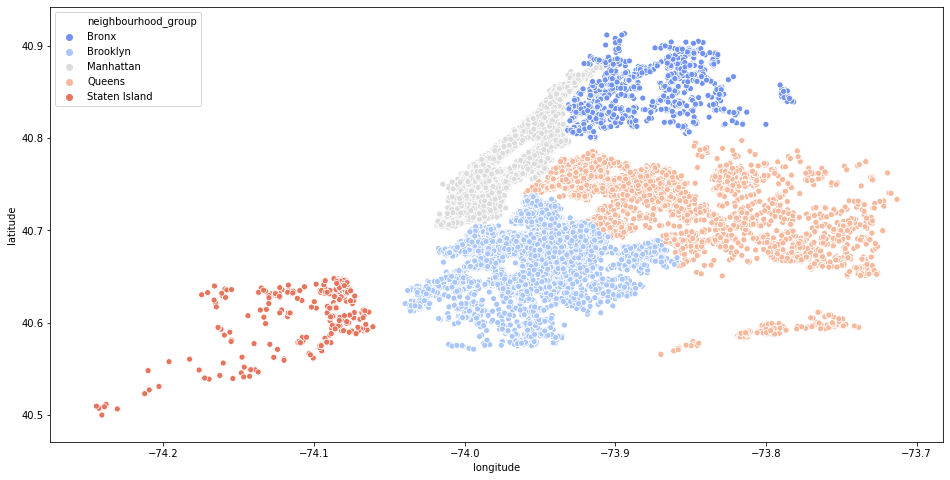

In [17]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=ds.latitude,x=ds.longitude,hue=ds.neighbourhood_group,palette="coolwarm")
plt.show()

## Observation

The output above shows the 5 regions in New York city map and the spread of AirBnb's in those locations.

<b>Count plot for neighbourhood_group. 

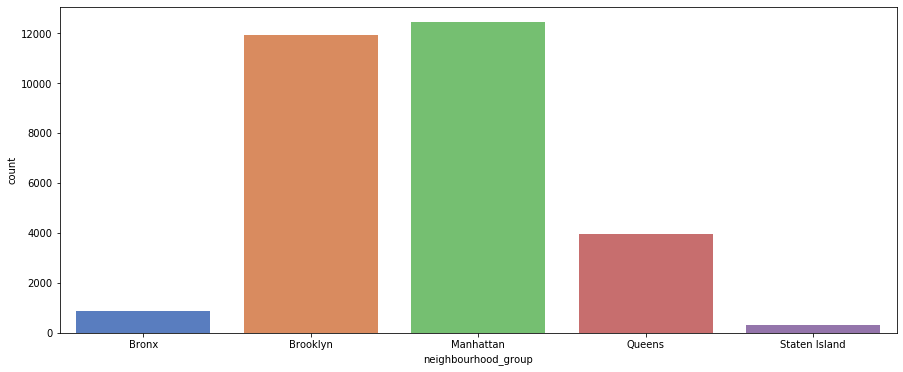

In [18]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(ds.neighbourhood_group,palette="muted")
plt.show()

## Observation

From the output above we can observe that Brooklyn and Manhattan have comparitively more number of AirBnB's in New York City and are quite popular .

<b>Visualizing pie plot to find the percentange of different types of rooms available in AirBnB's.

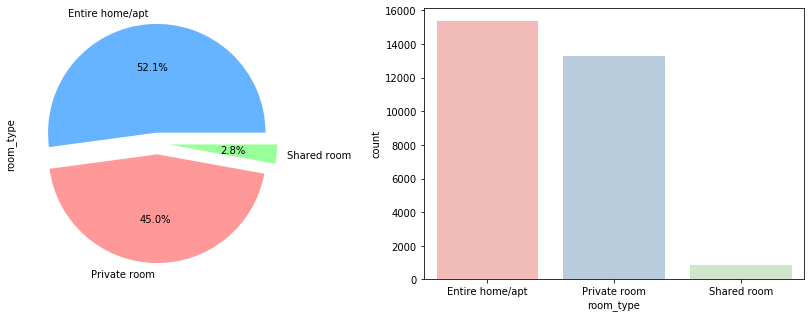

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,5))
ds.room_type.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#66b3ff','#ff9999','#99ff99'])
ax = sns.countplot(ds.room_type,palette="Pastel1")
plt.show()

## Observation

From the above output we can observe that the 'Entire home/apt' type are more in number which means guest prefer to have it entirely for themselves for their trips to feel like a home and can live like a family together.

<b>Bar plot representing the price for each neighbourhood_group

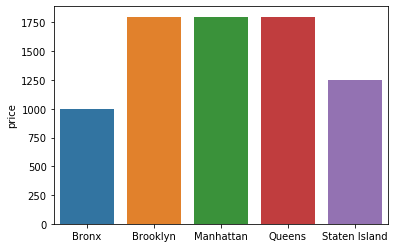

In [20]:
sns.barplot(ds["neighbourhood_group"].cat.categories, ds.groupby('neighbourhood_group')['price'].max())

## Observation 

From the above output we can observe that the prices for groups Brooklyn,Manhattan and Queens are higher compared to other 2 groups( Bronx, Staten Island).

<b>Violin plot to find the rating for each neighbourhood_group. 

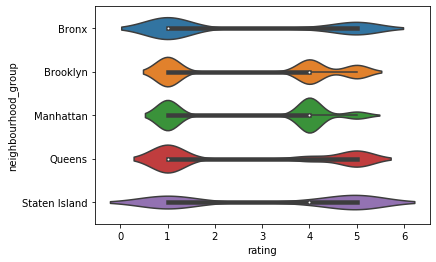

In [21]:
ax = sns.violinplot(x="rating", y="neighbourhood_group", data=ds)

## Observation 

Rating column derived from features - price,availability_365 and neighbourhood_group. We can observe  that the rating for Brooklyn and Manhattan has atleast rating 1 when compared to other groups.

# Modelling Phase : Association rules, Ensembling and Pipelining

## Discretization

We first discretized the numerical columns price and availability_365 columns into 5 categories to get proper association rules.

In [18]:
ds_a=ds.copy()
print(ds_a['price'].max())
print(ds_a['price'].min())
print(ds_a['availability_365'].max())
print(ds_a['availability_365'].min())

1800
10
365
1


In [19]:
price_bins = [0,50,100,300,350,1800]
price_categories = ['very low price','low price','medium range price','high price','very high price']
ds_a['price'] = pd.cut(ds_a['price'], price_bins, labels = price_categories)

In [21]:
av365_bins = [1,50,100,150,200,365]
av365_categories = ['very low availability','low availabilty','medium range availability','high availability','very high availability']
ds_a['availability_365'] = pd.cut(ds_a['availability_365'], av365_bins, labels = av365_categories)

# Association Rules


We used apriori algorithm to get association rules in the dataset. 

In [22]:
from apyori import apriori
ds_ab=ds_a[['neighbourhood_group','price','availability_365','room_type']]
records = []
for i in range(0,29545):
    records.append([str(ds_ab.values[i,j]) for j in range(0, 4)])

In [23]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.1, min_lift=3, min_length=2)

In [24]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: very low price -> Shared room
Support: 0.017464884075139617
Confidence: 0.6150178784266984
Lift: 4.905697413098489
Rule: Bronx -> Private room
Support: 0.008563208664748688
Confidence: 0.4764595103578154
Lift: 3.800484944255307
Rule: Brooklyn -> Shared room
Support: 0.008698595363005584
Confidence: 0.3063170441001192
Lift: 4.8735256154755096
Rule: very low price -> very high availability
Support: 0.010560162464037908
Confidence: 0.3718712753277712
Lift: 6.853984297915783
Rule: Brooklyn -> very high availability
Support: 0.0056523946522254185
Confidence: 0.19904648390941596
Lift: 7.351035458879618
Rule: very low price -> Private room
Support: 0.004603147740734473
Confidence: 0.39882697947214074
Lift: 3.1812481394450316


## One Hot Encoding Categorical features

Some machine learning algorithms like RandomForestRegressor need all the features in the dataset to be in numerical form. So in order to convert categorical features to numerical form we used One Hot Encoding. 

In [25]:
categorical_features = ds.select_dtypes(include=['category'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (29545, 3)


In [26]:
categorical_features_one_hot = pd.get_dummies(categorical_features)
categorical_features_one_hot.reset_index(drop=True, inplace=True)

## Normalization of numerical features using Standard Scaler

We performed normalization to change the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values. We used StandardScaler() for normalization.

Price is used as the target variable(y)
And 

In [27]:
numerical_features =  ds.select_dtypes(exclude=['object','category'])
sc = StandardScaler()
y = ds[['price']].values
y= sc.fit_transform(y)
numerical_features = numerical_features.drop(['price'], axis=1)
numerical_features = pd.DataFrame(sc.fit_transform(numerical_features), columns = numerical_features.columns)

Atlast we concatenated both the categorical and numerical features. And 

In [28]:
X = np.concatenate((categorical_features_one_hot,numerical_features),axis=1)
ds_concat = pd.concat([categorical_features_one_hot,numerical_features],axis=1)
#ds_new=ds_new.astype('int')

## Ensembling using Random forest Regressor

We used RandomForestRegressor() as ensembling method.  

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
tuned_parameters = {'n_estimators': [12, 300, 500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}
RF_gs = GridSearchCV(RandomForestRegressor(),param_grid=tuned_parameters, cv = 5)
RF_gs.fit(X_train, y_train)

C:\Users\Akshara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [32]:
r2_score(y_test, RF_gs.predict(X_test), multioutput='variance_weighted')

0.45127359579017995

# Pipelining

In [37]:
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union',feature_union))
estimators.append(('rfr',GridSearchCV(RandomForestRegressor(),param_grid= {'n_estimators': [12, 300, 500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}
, cv = 5)))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=15, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akshara\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vec

KeyboardInterrupt: 

# Bias Mitigation : 
There is no requirement for bias mitigation in our project as we don't have any such column(gender,age) in our dataset.